In [364]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split

# Importation du fichier kaggle

In [365]:
df_train_kaggle = pd.read_csv('./data/kaggle.csv')
df_train_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [366]:
df_train_kaggle.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [367]:
df_train_data_world = pd.read_csv('./data/data_world.csv')
df_train_data_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [368]:
df_train_data_world.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [369]:
df_train_data_world.sentiment.unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [370]:
df_train_data_world = df_train_data_world.drop(columns=['tweet_id', 'author'])
df_train_data_world.rename(columns={'sentiment': 'Emotion'}, inplace=True)
df_train_data_world.rename(columns={'content': 'Text'}, inplace=True)
df_train_data_world.head()

,Emotion,Text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


Text(-24.680555555555557, 0.5, 'Count')

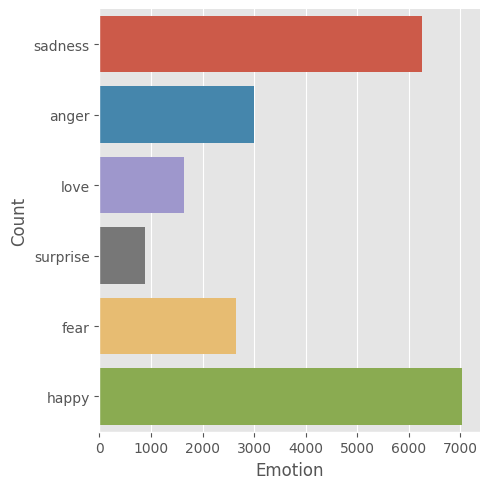

In [371]:
sns.catplot(y='Emotion', kind='count', data=df_train_kaggle) 
plt.xlabel("Emotion") 
plt.ylabel("Count") 

Text(-49.05555555555556, 0.5, 'Count')

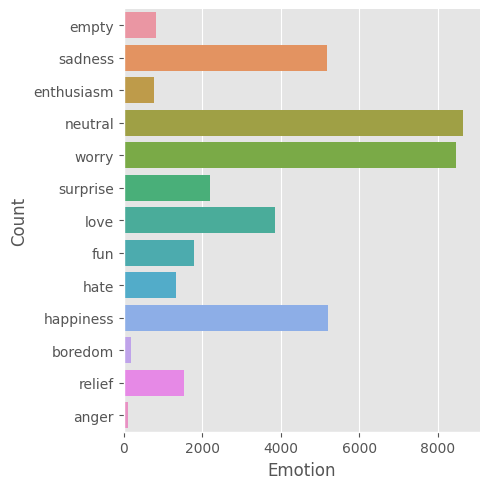

In [372]:
sns.catplot(y='Emotion', kind='count', data=df_train_data_world) 
plt.xlabel("Emotion") 
plt.ylabel("Count") 

In [373]:
# happy : happiness, fun, relief, enthusiasm
# sadness : sadness, boredom
# anger : anger, hate, 
# fear : worry 
# love : love
# surprise : surprise 

# empty : on supprime
# neutral : on supprime

In [374]:
liste_happy = ['happiness','fun','relief','enthusiasm']
liste_sadness = ['sadness','boredom']
liste_anger = ['anger','hate']
liste_fear = ['worry']
liste_love = ['love']
liste_surprise = ['surprise']

In [375]:
df_train_data_world['Emotion'] = df_train_data_world['Emotion'].replace(liste_happy,'happy')
df_train_data_world['Emotion'] = df_train_data_world['Emotion'].replace(liste_sadness,'sadness')
df_train_data_world['Emotion'] = df_train_data_world['Emotion'].replace(liste_anger,'anger')
df_train_data_world['Emotion'] = df_train_data_world['Emotion'].replace(liste_fear,'fear')
df_train_data_world['Emotion'] = df_train_data_world['Emotion'].replace(liste_love,'love')
df_train_data_world['Emotion'] = df_train_data_world['Emotion'].replace(liste_surprise,'surprise')
df_train_data_world['Emotion']

df_train_data_world.drop(df_train_data_world.loc[df_train_data_world['Emotion']=='empty'].index, inplace=True)
df_train_data_world.drop(df_train_data_world.loc[df_train_data_world['Emotion']=='neutral'].index, inplace=True)

In [376]:
df_train_full = pd.concat([df_train_data_world, df_train_kaggle])
df_train_full

,Emotion,Text
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,happy,wants to hang out with friends SOON!
5,fear,Re-pinging @ghostridah14: why didn't you go to...
6,sadness,"I should be sleep, but im not! thinking about ..."
...,...,...
21454,fear,Melissa stared at her friend in dism
21455,fear,Successive state elections have seen the gover...
21456,fear,Vincent was irritated but not dismay
21457,fear,Kendall-Hume turned back to face the dismayed ...


Text(-24.680555555555557, 0.5, 'Count')

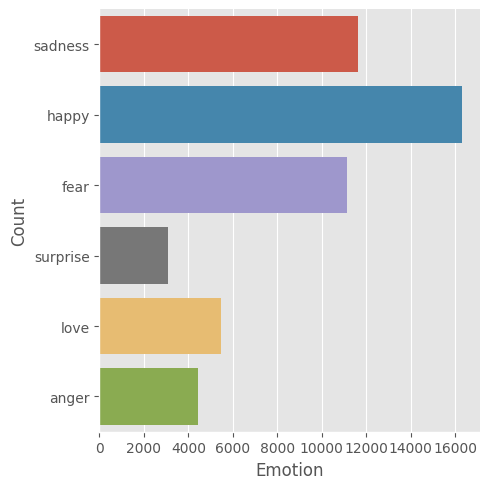

In [377]:
sns.catplot(y='Emotion', kind='count', data=df_train_full) 
plt.xlabel("Emotion") 
plt.ylabel("Count")

In [378]:
categories = df_train_full.Emotion.unique()
categories

array(['sadness', 'happy', 'fear', 'surprise', 'love', 'anger'],
      dtype=object)

In [379]:
filepath = Path('data/df_train_full.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_train_full.to_csv(filepath)
df_train, df_test,= train_test_split(df_train_full, test_size=0.20 ,random_state=42)

In [380]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vect = CountVectorizer(strip_accents='ascii', lowercase=True, stop_words='english' ,max_df=0.9, min_df=2)
# On commence avec un preprocessing minimal (lower, token = word)
X_train_counts = count_vect.fit_transform(df_train.Text)
print(f"dimension de la matrice de comptage: {X_train_counts.shape}")


dimension de la matrice de comptage: (41595, 14507)


In [381]:
def visualize_word_freq(input_data,max_words,title_pre,tfidf=False):
    """ 
    Input data should be a list of docs.
    Each doc is represented by one whole string (with preprocessing, eg.remove markups)    
    """
    # Plot configuration
    plt.style.use("ggplot")
    plt.rcParams['axes.titlesize'] = 32
    plt.rcParams['figure.figsize'] = (20.0, 5.0)
    plt.rcParams['xtick.labelsize'] = 10
    
    if tfidf:
        vectorizer = TfidfVectorizer(max_features=max_words,stop_words='english',use_idf=True, max_df=0.9, min_df=2)
        TITLE = title_pre+" - "+"Most Freq Words (TFIDF)"
    else:
        vectorizer = CountVectorizer(max_features=max_words,stop_words='english', max_df=0.9, min_df=2)
        TITLE = title_pre+" - "+"Most Freq Words"
        
    mat = vectorizer.fit_transform(input_data)
    
    pd.DataFrame(mat.sum(axis=0).T,
             index=vectorizer.get_feature_names_out(),
             columns=['freq']).sort_values(by='freq',
                                           ascending=False).plot(kind='bar',title=TITLE)

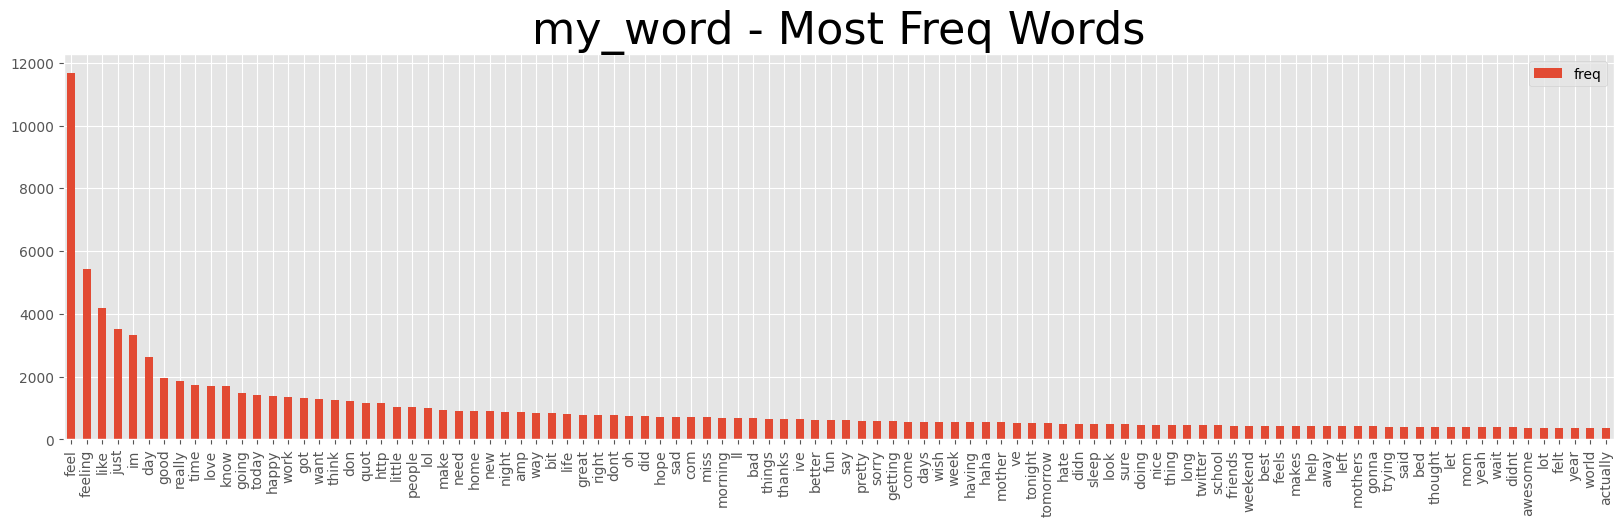

In [382]:
sw = ['english' ]
visualize_word_freq(df_train.Text,100, 'my_word')

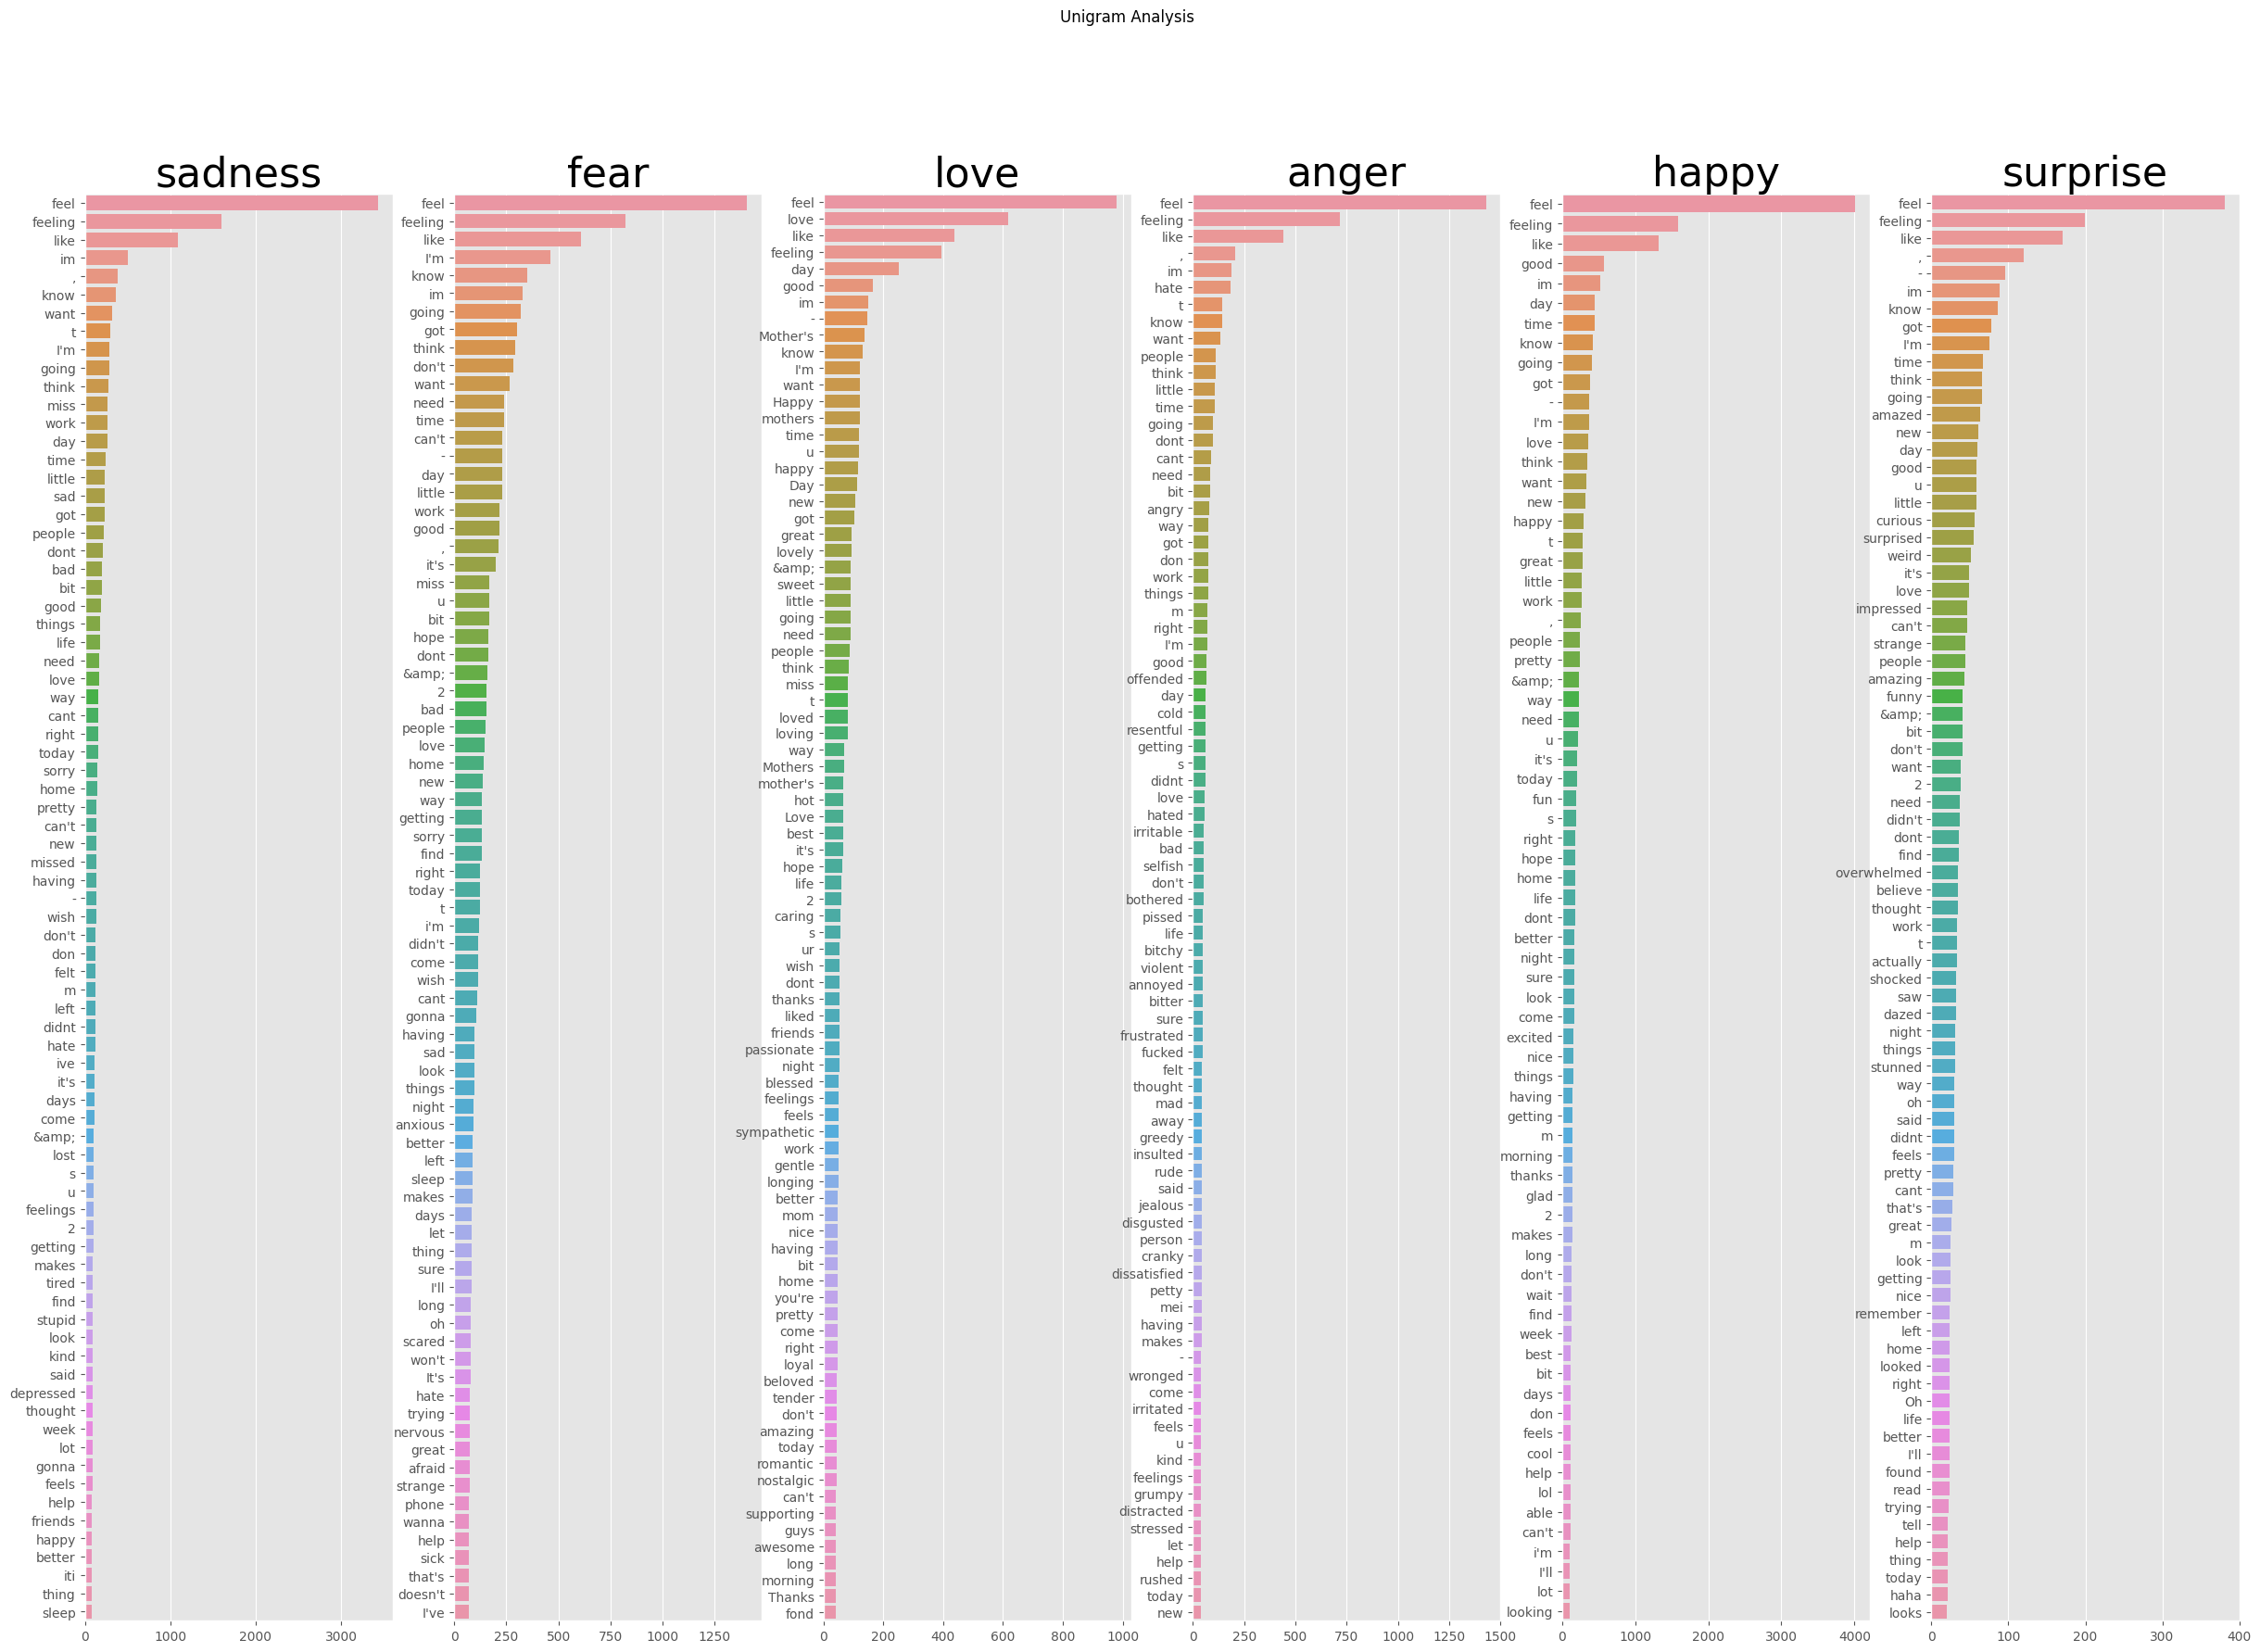

In [383]:
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

fig, axes = plt.subplots(1,len(df_train['Emotion'].unique()), figsize=(30,20))
fig.suptitle('Unigram Analysis')

for index,emotion in enumerate(df_train['Emotion'].unique()):
    dct=defaultdict(int) 
    curdf=df_train[df_train['Emotion']==emotion]
    allwordsarr=curdf['Text'].str.cat().split()
    counter=Counter(allwordsarr)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:200]:
        if (word.lower() not in STOP_WORDS):
            x.append(word)
            y.append(count)
    sns.barplot(ax=axes[index],x=y,y=x)
    axes[index].set_title(str(emotion))

In [384]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, df_train.Emotion)



In [385]:
X_test_counts = count_vect.transform(df_test.Text)
predicted = clf.predict(X_test_counts)
predicted

array(['fear', 'love', 'sadness', ..., 'anger', 'love', 'fear'],
      dtype='<U8')

In [386]:
from sklearn.metrics import accuracy_score
accuracy_score(df_test.Emotion, predicted)

0.5699586498701799

In [387]:
from sklearn import metrics
print(metrics.classification_report(df_test.Emotion, predicted))

              precision    recall  f1-score   support

       anger       0.80      0.48      0.60       935
        fear       0.48      0.52      0.50      2247
       happy       0.58      0.76      0.66      3221
        love       0.53      0.35      0.42      1090
     sadness       0.62      0.62      0.62      2305
    surprise       0.45      0.09      0.15       601

    accuracy                           0.57     10399
   macro avg       0.57      0.47      0.49     10399
weighted avg       0.57      0.57      0.55     10399



In [388]:
docs_new = ['God is love', 'fuck the world is not enough', "I am very sorry for you lost","i win a lot today, I am the best"]
X_new_counts = count_vect.transform(docs_new)
predicted = clf.predict(X_new_counts)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))

'God is love' => love
'fuck the world is not enough' => sadness
'I am very sorry for you lost' => sadness
'i win a lot today, I am the best' => happy


In [389]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB()),
])